**Overview:**
This project focuses on analyzing employee attrition to understand the factors that lead to turnover in the company. By leveraging data-driven insights, the analysis aims to identify key predictors of employee attrition, such as job satisfaction, compensation, and departmental differences. The goal is to provide actionable recommendations that can help the organization reduce turnover, retain talent, and improve overall employee satisfaction.

***Objective:***

The primary objective of this project is to identify the key factors influencing employee attrition. Specifically, the analysis aims to: Investigate the relationship between various employee attributes (e.g., job satisfaction, years at the company, salary) and the likelihood of attrition. Identify departments or roles with higher attrition rates. Predict employee attrition based on variables such as compensation and job satisfaction. Offer actionable insights and recommendations to reduce attrition and improve employee retention.

# I have prepared some business questions:

**What factors are most predictive of employee attrition (leaving the company)?**

**Is there a relationship between job satisfaction and employee attrition?**

**Which department has the highest employee attrition rate?**

**How does the number of years at the company impact attrition?**

**Can we predict attrition based on salary and compensation variables (e.g., monthly income, percent salary hike)?**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df['Department']

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [8]:

#Encoding categorical variables:
label_encoder = LabelEncoder()

#Converting Attrition, Gender, Over18 and Overtime into Binary:
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  ##Yes = 1, No = 0
df['Gender']  = label_encoder.fit_transform(df['Gender'])      ##Male = 1, Female = 0 
df['Over18'] = label_encoder.fit_transform(df['Over18'])      ##Y=1
df['OverTime'] = label_encoder.fit_transform(df['OverTime']) ##Yes = 1, No= 0



In [9]:
##One-Hot Encoding only to existing categorical columns:
#Re-define the columns list based on the actual columns in your dataset after encoding:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
##Apply one-hot Encoding for the actual columbs that exists:
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

#Display
df.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,False,True,False,False,False,False,False,False,True,False


In [11]:
print("current columns in the DataFrame:\n", df.columns)

current columns in the DataFrame:
 Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician

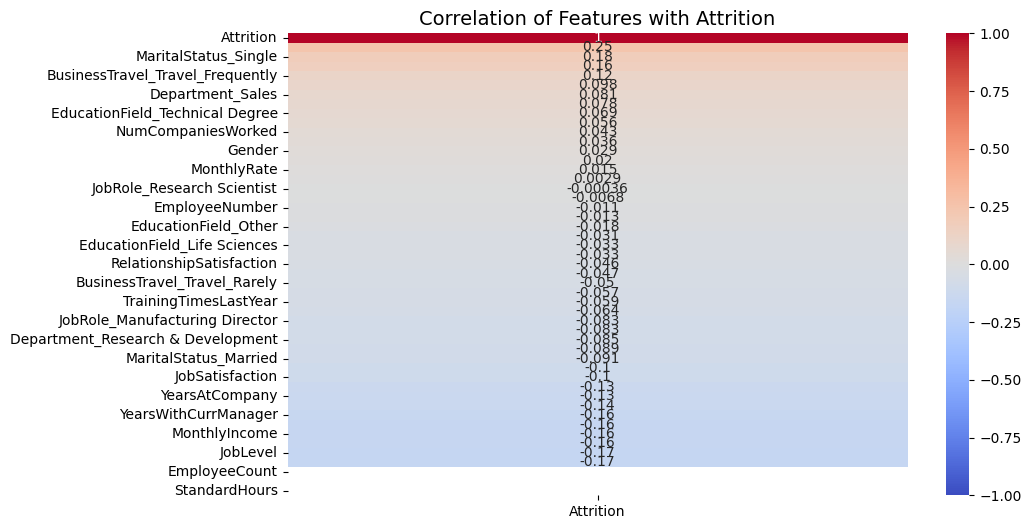

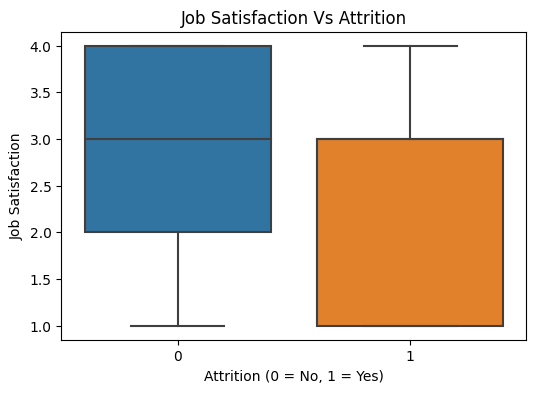

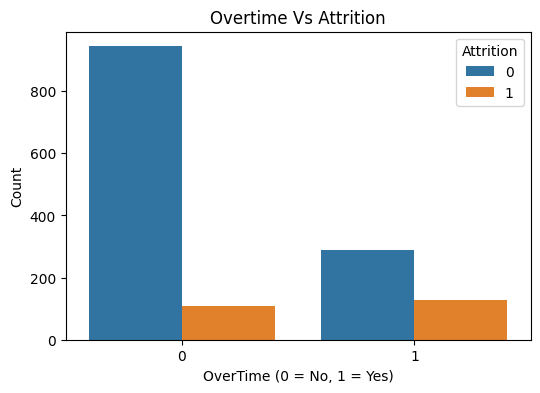

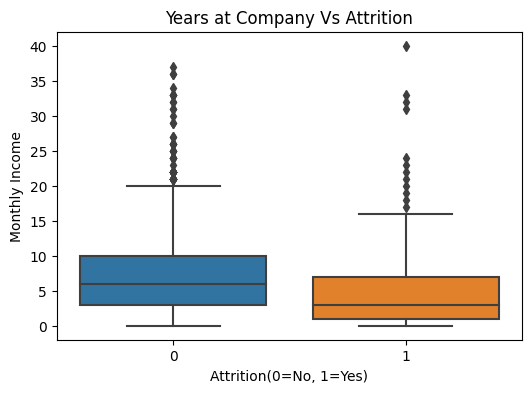

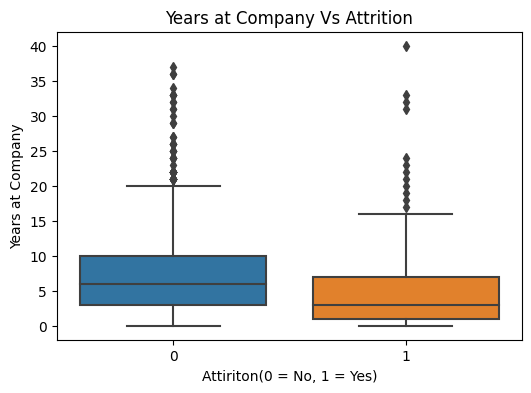

In [12]:
##COrrelation analysis

corr_matrix = df.corr()

#Plotting the correlation through heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending = False), annot=True, cmap='coolwarm', vmin =-1, vmax=1)
plt.title("Correlation of Features with Attrition", fontsize = 14)
plt.show()

##Visualizing Relations with key features:

# 1. Job Satisfaction Vs Attrition:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction Vs Attrition', fontsize = 12)
plt.xlabel('Attrition (0 = No, 1 = Yes)', fontsize = 10)
plt.ylabel('Job Satisfaction', fontsize=10)
plt.show()

# 2.Overtime Vs Attiriton
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data = df)
plt.title('Overtime Vs Attrition', fontsize = 12)
plt.xlabel('OverTime (0 = No, 1 = Yes)', fontsize = 10)
plt.ylabel('Count', fontsize=10)
plt.show()

# 3.Monthly Income Vs Attrition:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data= df)
plt.title('Years at Company Vs Attrition', fontsize=12)
plt.xlabel('Attrition(0=No, 1=Yes)', fontsize=10)
plt.ylabel('Monthly Income', fontsize=10)
plt.show()

# 4. Years at company Vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data = df)
plt.title('Years at Company Vs Attrition', fontsize=12)
plt.xlabel('Attiriton(0 = No, 1 = Yes)', fontsize=10)
plt.ylabel('Years at Company', fontsize=10)
plt.show()

In [13]:
print(df.dtypes)

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkin

In [14]:
#Converting Boolean columns to Int:
df = df.astype({col:'int' for col in df.select_dtypes('bool').columns})

In [15]:
#Applying Hot-Encoding:
df = pd.get_dummies(df, drop_first=True)

In [16]:
#Checking for non-numeric data:
non_numeric = df.applymap(lambda x: isinstance(x,str))

#Display columns with any string:
if non_numeric.any().any():
    print('Columns with non-numeric value:')
    print(df.column[non_numeric.any()])
else:
    print('All columns are numeric')

All columns are numeric


/tmp/ipykernel_17/3673961225.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = df.applymap(lambda x: isinstance(x,str))


In [17]:
##Finding non numeric 
for col in df.columns:
    non_numeric_rows = df[df[col].apply(lambda x:isinstance(x, str))]
    if len(non_numeric_rows) > 0:
        print(f"column{col} has non-numeroc values:\n{non_numeric_rows}")

In [18]:
#Predicting the Model

#1. Data Preprocessing
x = df.drop(['Attrition','EmployeeNumber'], axis=1)
y = df['Attrition']

#2.Train-test split(70% trian, 30% test)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42, stratify=y)

#3.Train the logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#Making prediciton on the test model:
y_pred = model.predict(X_test)

#Evaluating the model:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[365   5]
 [ 61  10]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.67      0.14      0.23        71

    accuracy                           0.85       441
   macro avg       0.76      0.56      0.57       441
weighted avg       0.83      0.85      0.81       441

ROC AUC Score: 0.5636657784545109


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Check if there are any hidden non-numeric values in the entire DataFrame
for col in df.columns:
    non_numeric_rows = df[~df[col].apply(lambda x: pd.api.types.is_numeric_dtype(type(x)))]
    if not non_numeric_rows.empty:
        print(f"Column {col} contains non-numeric values:\n{non_numeric_rows}")


In [20]:
# Check the unique values in the 'Attrition' column
print("Unique values in Attrition column:", df['Attrition'].unique())


Unique values in Attrition column: [1 0]


In [21]:
# Forcefully convert all columns to numeric and raise errors for problematic values
df = df.apply(pd.to_numeric, errors='raise')

# Re-run the train-test split and model training
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


[[365   5]
 [ 61  10]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.67      0.14      0.23        71

    accuracy                           0.85       441
   macro avg       0.76      0.56      0.57       441
weighted avg       0.83      0.85      0.81       441

ROC AUC Score: 0.5636657784545109


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Due to poor performace of the model the prediction is inacurate.
#To balance the model we will be working on feature scaling:

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#1. scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2.Halde class imbalace with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#Train-test split after resampling:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)

#Train the logistic Regression model with more iterations:
model = LogisticRegression(max_iter = 5000, random_state = 42)
model.fit(X_train, y_train)

##Prediction and Evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC Score', roc_auc_score(y_test, y_pred))


[[277  92]
 [ 70 301]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       369
           1       0.77      0.81      0.79       371

    accuracy                           0.78       740
   macro avg       0.78      0.78      0.78       740
weighted avg       0.78      0.78      0.78       740

ROC AUC Score 0.7809991307460245


True Negative(Correctly predicted employees who stayed).

ROC AUC Score: 78% (Strong indicator that model is effective)

In [23]:
##Selecting features for RandomForest:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

##Initializing the random forest model:
rf_model = RandomForestClassifier(random_state=42)


#Defining the parameter grid for tuninig:
param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[10,20,30,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}

#3. RandomizedSearchCV to find the best Hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')

#4. fit the random forest model:
rf_random.fit(X_train, y_train)

#5. Making predictions and evaluate the model
y_pred = rf_random.best_estimator_.predict(X_test)

#printing the best parameters and matrix:
print(f"Best parameters:{rf_random.best_params_}")
print(f"Best ROC AUC Score on Validation Set:{rf_random.best_score_}")

#Features importances from the best random forest model
importances = rf_random.best_estimator_.feature_importances_
featurs = X_train.columns

#Creating a dataset for feature importance:
feature_importance_df = pd.DataFrame({'Feature': freatures, 'Importance': importances}).sort_values(by='Importance', ascending = False)

#Displaying the top 10 Features:
print(feature_importance_df.head(5))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best ROC AUC Score on Validation Set:0.9823740410444254


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
df['JobSatisfaction']

Q2. ***Is there a Relationship between job satisfaction and employee attrition?***

In [ ]:
##Visuals of distributions of Job Satisfaction for employees who stayed Vs those who left

plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data = df)
plt.title('Job Satisfaction Vs Attrition')
plt.xlabel('Attrition(0 = Stayed, 1 = Left)')
plt.ylabel('Job Satisfaction')
plt.show()

In [ ]:
from scipy import stats

#Separate employee who left and those who stayed:
left = df[df['Attrition'] == 1]['JobSatisfaction']
stayed = df[df['Attrition'] ==0]['JobSatisfaction']

#Performing a t-test to check if there is a significant difference:
t_stat, p_value = stats.ttest_ind(left,stayed)

print(f'T-statistcs:{t_stat}')
print(f'P-value:{p_value}')

In [ ]:
#Modeling the impact of job satisfaction:

#Random forest model training to check the importance of Job Satisfaction:

#defining feature x and target y:
x = df.drop(['Attrition','EmployeeNumber'], axis=1)
y = df['Attrition']

#Train-test split method:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

#Training the random forest model:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Get feature importance:
importances = rf_model.feature_importances_
features = X_train.columns

#Creating a DF for feature importance:
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending = False)

print(feature_importance_df[feature_importance_df['Feature']=='JobSatisfaction'])


Conclusion:

>>The statistical analysis (t-test) showed that there is a significant relationship between Job Satisfaction and Attrition (employees who left had lower job satisfaction).

>>However, according to the Random Forest feature importance, Job Satisfaction alone is not a major driver of attrition compared to other factors in dataset.


Q3. ***Which department has the highest employee turnover?***

In [ ]:
#Group by department and calculatinf the attrition rate %

attrition_by_dept = df.groupby('Department')['Attrition'].mean()*100

#Sorting department by attrition rate in desc:
attrition_by_dept = attrition_by_dept.sort_values(asceding = False)

print(attrition_by_dept)


In [ ]:
df.info()

In [ ]:
#Reconstructing the department columns:


department_mapping = {
    'Department_Sales':'Sales',
    'Department_Research & Development': 'Research & Development'
}

##Reconstructing the department column by checking which one-hot encoded column has a value of 1:
df['Department'] = df[['Department_Sales','Department_Research & Development']].idxmax(axis=1)

#Mapping the one-hot encoded column names back to the original department:
df['Department'] = df['Department'].map(department_mapping)


print(df[['Department', 'Department_Sales', 'Department_research & Development']].head())
##Grouping by Department and calculating the attrition rate%:

#attrition_by_dept = df.groupby('Department')['Attrition'].mean * 100

In [ ]:
def get_department(row):
    if row['Department_Research & Development'] == 1:
        return 'Research & Development'
    elif row['Department_Sales'] == 1:
        return 'Sales'
    
df['Department'] = df.apply(get_department, axis=1)
print(df[['Department', 'Department_Sales', 'Department_Research & Development', 'Department_Sales']].head())

In [ ]:
##Grouping by department and calculating the attrition rate%:
attrition_by_dept = df.groupby('Department')['Attrition'].mean() * 100

#Sorting departments by attrition rate:
attrition_by_dept = attrition_by_dept.sort_values(ascending = False)

print(attrition_by_dept)

In [ ]:
##Plotting the attrtion rate by department using bar chart:

plt.figure(figsize=(10,6))
attrition_by_dept.plot(kind='bar', color = 'skyblue')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate in (%)')
plt.xticks(rotation=45)
plt.show()

Results:
    
1.	T-statistic: -5.196
    
o	The t-statistic shows that there is a large difference in the number of years at the company between employees who left and those who stayed. 
A negative t-statistic indicates that employees who left tend to have fewer years at the company than those who stayed.

2.	P-value: 2.3188716103863036e-07
    
o	The p-value is extremely small (much less than 0.05), 
which means the difference in YearsAtCompany between employees who left and those who stayed is statistically significant.

o	In other words, the number of years at the company has a significant impact on whether employees leave.

Q4. ***How does the number of years at the company impact attrition?***

In [ ]:
#Visualizing Attrition Vs YearsAtComapny:

#Plotting the distribution of yearsatcompany for employees who stayed and who left:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Attrition Vs Years at Company')
plt.xlabel('Attrition(0 = Stayed, 1 = left)')
plt.ylabel('Years at company')
plt.show()

In [ ]:
from scipy import stats

#Separating the data into employees who ledt and who stayed:

left = df[df['Attrition'] ==1]['YearsAtCompany']
stayed = df[df['Attrition'] == 0]['YearsAtCompany']

#T-Test 
t_stat, p_value = stats.ttest_ind(left,stayed)
print(f"T-statistics:{t_stat}")
print(f"P-value:{p_value}")

In [ ]:
#Building Logisitic Regression Model:

from sklearn.preprocessing import StandardScaler

#Selecting the freatures for the model:

features = ['YearsAtCompany','JobSatisfaction', 'OverTime','MonthlyIncome']
x=df[features] #Independent variableS(feature)
y=df['Attrition'] #Dependent variable

#Splitting the data into training and testing sets (70% train, 30%test)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

#Standardize the data(logisitc Regression)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
#Training logistic regression:
logreg = LogisticRegression(max_iter=10, random_state = 42)

#training the model on the training data:
logreg.fit(X_train, y_train)

#Evaluating the model:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
#Over-sampling using Attrition and YearsAtCompany Variables:

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

#
smote = SMOTE(random_state=42)

#Applying  SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#training the logisitc regression model:

logreg.fit(X_train_resampled, y_train_resampled)

#evaluation
p_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score:{roc_auc_score(y_test, y_pred)}')

In [ ]:
#Random forest with clas weight:
from sklearn.ensemble import RandomForestClassifier

#Initalizing the random forest model with class weights to handle imablance data:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

#Training the model on the training data:
rf.fit(X_train_resampled, y_train_resampled)

#Predicting the test set:
y_pred_rf = rf.predict(X_test)

#Evaluating the model:
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_rf)}")

Q5. **Can we predict attrition based on salary and compensation variables (e.g., monthly income, percent salary hike)?**

In [ ]:
#Visualizing the relationships MonthlyIncome Vs Attrition and %salaryHike Vs Attrition:


##Boxplot for MonthlyIncome Vs Attrition:
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data = df)
plt.title('Monthly Income Vs Attrition')
plt.xlabel('Attrition(0 = stayed, 1= left)')
plt.ylabel('Monthly Income')
plt.show()

In [ ]:
##Boxplot for percentage Salary Hike Vs Attrition:

plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='PercentSalaryHike', data = df)
plt.title('Percent Salary Hike Vs Attrition')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Percent Salary Hike')
plt.show()

In [ ]:
##Performing t-test to check if there are significant differences in MonthlyIncome and PercentSalaryHike between employees who left and those who stayed.

from scipy import stats

#Separating the data into employees who left and who stayed:
left_income = df[df['Attrition'] == 1]['MonthlyIncome']
stayed_income = df[df['Attrition'] == 0]['MonthlyIncome']

#Perforing a t-test for MonthlyIncome:
t_stat_income, p_value_income = stats.ttest_ind(left_income, stayed_income)

print(f"T-statistics for Monthly Income: {t_stat_income}")
print(f"P-Value for Monthly Income: {p_value_income}")

***T-statistic: -6.20***

This indicates a significant difference in the average Monthly Income between employees who left the company and those who stayed.
The negative sign means that the average Monthly Income of employees who left is lower than that of employees who stayed.


***P-value: 7.15e-10 (which is 0.000000000715)***

The p-value is extremely small, much less than the typical significance level of 0.05, which means the difference in Monthly Income between the two groups is statistically significant.
In other words, there is a strong indication that Monthly Income plays a role in employee attrition.

***Conclusion:***
The analysis shows that employees with lower Monthly Income are more likely to leave the company. This suggests that salary might be a factor influencing employee turnover, and increasing compensation could potentially help in reducing attrition.

***Over all Conclusion:***

The analysis of employee attrition revealed several key insights. Factors such as job satisfaction, years at the company, and compensation significantly impact the likelihood of employees leaving. Certain departments exhibit higher attrition rates, indicating areas where retention efforts should be prioritized. The findings suggest that targeted strategies focusing on improving job satisfaction, adjusting compensation practices, and supporting employees with shorter tenures could help reduce attrition and enhance overall workforce stability. These insights provide a foundation for data-driven decisions aimed at improving employee retention.